In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Unsupervised Learning</center></h1>

### 10.1 The Challenge of Unsupervised Learning

<b>Unsupervised learning</b> is often performed as a a part of an <b>exploratory data analysis</b>. In unsupervised learning there is no practical way to assess the performance of the model as we do not have the true answer.

### 10.2 Principal Components Analysis

In the case of a large set of correlated variables, principal component analysis helps in summarizing the data set with a small number of representative variables that explains most of the variability in the data. The principal component directions are the directions in the feature space along which the original data is <b>highly variable</b>. <b>Principal component analysis (PCA)</b> refers to the process by which principal components are computed.

#### 10.2.1 What Are Principal Components?

To visualize a data set with $n$ observations with a $p$ sets of features $X_1, X_2, ..., X_p$, we can examine $p \choose 2$ two-dimensional scatter plots of the data. For a large value of $p$, the process is cumbersome and most likely none of them will informative as each contain only a small fraction of total information present in the data. Hence, we would be keen to find a low-dimensional representation of the data that captures as much of the information as possible in the data set. PCA finds this low-dimensional representation of the data set that contains as much as possible of the variation. Each of the dimensions found by PCA is a <b>linear combination</b> of the $p$ features.

The <b>first principal component</b> of a set of features $X_1, X_2, ..., X_p$ is the <b>normalized</b> linear combination of the featues

$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + ... + \phi_{p1}X_p$$

that has the <b>largest variance</b>. By <b>normalized</b>, we mean that $\sum_{j=1}^{p} \phi_{j1}^2 = 1$. The elements $\phi_{11}, \phi_{21}, ... \phi_{p1}$ are referred to as the <b>loading</b> of the first principal component. Without normalization of the loadings, the  values can be set to arbitrarily large values and hence resulting is a large variance.

As for the computation of first principal componenet, we are mainly interested in the variance, we can assume that each of the features in the data set has been centered to have 0 mean. Then, we need to maximize the variance with a constraint that the loadings are normalized. Hence, the first principal component loading vector solves the optimization problem

$$maximize_{\phi_{11}, \phi_{21}, ..., \phi_{p1}} \bigg\{ \frac{1}{n} \sum_{i=1}^{n} \bigg( \sum_{j=1}^{p}  \phi_{j1}x_{ij}\bigg)^2\bigg\} \ subject \ \ to \ \ \sum_{j=1}^{p}\phi_{j1}^2 = 1$$ 

The above mentioned objective can instead be written as $\frac{1}{n} \sum_{i=1}^{n} z_{i1}^2$. As the mean of $z_i$s will be 0 as well, the objective that we are maximizing is simply the sample varince of the $n$ values of z_{i1}. $z_{11}, z_{21}, ..., z_{n1}$ are called as the <b>scores</b> of the first principal component. This problem can be solved via an <b>eigen decomposition</b>.

Geometrically, if we project the $n$ data points $x_1, x_2, ..., x_n$ along the direction of the loading vector of the first principal component, the projected values are the principal componenet scores $z_{11}, z_{21}, ..., z_{n1}$.

Similarly, the <b>second principal component</b> is the linear combination of $X_1, X_2, ..., X_p$ that has maximal variance out of all linear combinations that are <b>uncorrelated</b> with $Z_1$. It takes the form 

$$z_{i2} = \phi_{12}x_{i1} + \phi_{22}x_{i2} + ... + \phi_{p2}x_{ip}$$

where $\phi_2$ is the second principal component loading vector, with elements $\phi_{12}, \phi_{22}, ..., \phi_{p2}$. Constraining $Z_2$ to be uncorrelated with $Z_1$ results in the direction of $\phi_2$ to be <b>orthogonal</b> of $\phi_1$. The optimization problem for finding the second principal componenet can be formed in a similar way as the one for the first principal component with an additional constraint that the $\phi_2$ is orthogonal to $\phi_1$. It turns out that the principal component directions $\phi_1, \phi_2, \phi_3, ...$ are the ordered sequence of eigenvectors of the matrix $X^TX$, and the eigenvalues are the variance of the components.

Usually, PCA is performed after <b>standardizing each variable to have mean 0 and standard deviation 1</b>.

#### 10.2.2 Another Interpretation of Principal Components

Alternatively, principal components can be viewed as the low-dimensional linear surfaces that are <b>closest</b> to the observations. The first principal component loading vector can be viewed as the line in the $p$-dimensional space that is closest to the $n$ observations (closeness is defined in terms of Euclidean distance). This can be explained simply as we seek a single dimension of the data which is as close as possible to all the data points. It is more likely that this line will explain the variation in data more aptly.

This notion can be extended for second and higher principal components as well. The first two principal components can be viewed as the plane that is closest to the $n$ observations in terms of Euclidean distance. Using this interpretation, first $M$ principal components, with their scores and loading vectors, provides the best $M$-dimensional approximation of the data set in terms of the Euclidean distance. For a sufficiently large value of $M$, the $M$ principal components score and loading vectors provide a good approximation for the observations. When $M = min(n-1, p)$, the the representation is exact and hence $x_{ij} = \sum_{m=1}^{M} z_{im} \phi_{jm}$.

#### 10.2.3 More on PCA

##### Scaling the Variables

The results of PCA also depend on the fact that whether <b>the variables are individually scaled or not</b>. If we perform PCA on the unscaled variables, the variables with higher variance will have very <b>large loading</b>. As it is undesirable for the principal components obtained to depend on the scale of the variables, we scale each variables to have the <b>standard deviation 1</b> before performing PCA. If the individual variables are measured in the same unit, the scaling need not to be done.

##### Uniqueness of the Principal Components

Each principal component loading vecotor is unique upto a <b>sign flip</b>. The sign of the loading vectors may differ as they specify directions in the $p$-dimensional space and hence flipping the sign has no effect. Similarly, the score vectors are unique up to a sign filp as the varince of $Z$ and $-Z$ are same.

##### The Proportion of Variance Explained

We may be iterested in the amount of variance that has been explained by projecting the data on to first $M$ principal components. This means that we are interested in knowing the <b>proportion of variance explained (PVE)</b> by each principal component. The <b>total variance</b> present in the data set can be given as:

$$\sum_{j=1}^{p} Var(X_j) = \sum_{j=1}^{p} \frac{1}{n} \sum_{i=1}^{n} x_{ij}^2$$

and the variance that is explained by the $m^{th}$ principal comonent is:

$$\frac{1}{n} \sum_{i=1}^{n} z_{im}^2 = \frac{1}{n} \sum_{i=1}^{n} \bigg( \sum_{j=1}^{p} \phi_{jm}x_{ij}\bigg)^2$$

Hence, <b>PVE</b> of the first principal component can be given as:

$$\frac{\sum_{i=1}^{n} \bigg( \sum_{j=1}^{p} \phi_{jm}x_{ij}\bigg)^2}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{ij}^2}$$

In order to obtain the PVE of first $M$ principal components, we can calculate each individual PVEs using the above equation and then sum them all.

##### Deciding How Many Principal Components to Use

The main goal of PCA is to find the smallest number of principal components that explains a good bit of variance in data. We can decide on the number of principal components to be used by examining the <b>scree plot</b>. It can be done by simply eyeballing the scree plot and finding a point at which the amount of variance explained by subsequent principal component drops off. This point is referred as the <b>elbow</b> in the scree plot.

This visual analysis is kind of <b>ad hoc</b> and there is no well-accepted objective way to decide on the number of principal components to be used. The number of principal components to be used depends on the area of application and the nature of the data set.

A simple approach is to find the first few principal components and then examine that whether there exists some interesting pattern in the data or not. If no pattern is found in the first few principal components, the subsequent principal components will be of lesser interest as well. This is a subjective approach and reflects on the fact that principal components are used for exploratory data analysis.

Principal components can be used for supervised analysis (as in principal component regression) as well. In this case, there is a simple and objective way to decide the number of principal components. The number of principal components to be used can be treated as a tuning parameter and can be decided by cross-validation or similar techniques.

#### 10.2.4 Other Uses for Principal Components

Like principal component regression, the principal component score vectors can be used as the features in several supervised learning techniques. This will lead to <b>less noisy</b> results as it is often the case that signal in the data set is concentrated in the first few principal components.

### 10.3 Clustering Methods

<b>Clustering</b> is a technique for finding <b>subgroups</b> or <b>clusters</b> in a data set based on similarity between individual observations. For clustering, we need to define the measure of similarity which depends on the knowledge of the data set. Two best known clustering methods are <b>K-means clustering</b> and <b>hierarchical clustering</b>. In K-means clustering, we partition the observations into a pre-defined number of clusters. In hierarchical clustering, the number of clusters is unknown and the results of clustering is represented as a <b>dendrogram</b>, which is a tree-like visualization technique that allows us to view the clustering results for various number of clusters (from 1 to $n$).

#### 10.3.1 K-Means Clustering

To perform K-means clustering, we first specify the number of clusters $K$ and then the K-means algorithm is used to assign each observation to exactly one of the $K$ clusters. Let $C_1, C_2, ..., C_K$ denote sets containing the indices of the observations in each cluster, then these sets satisfy two properties:

 - $C_1 \bigcup C_2 \bigcup ... \bigcup C_K = \{1,2,3,...,n\}$.
 
 
 - $C_k \bigcap C_{k^{'}} = \Phi$ for all $k \neq k^{'}$.
 
In a good clustering, the <b>within-cluster variation</b> is as small as possible. The within-cluster variation, denoted as $W(C_k)$, is a measure of the amount by which the observations within a cluster differ from each other. Hence, for clustering, we want to solve the problem

$$minimize_{C_1, C_2, ..., C_K} \bigg \{ \sum_{k=1}^{K} W(C_k)\bigg \}$$

In order to solve the above problem, we need to define the within-clustre variation more concretely. The most common choice is <b>squared Euclidean distance</b>, which is defined as

$$W(C_k) = \frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i^{,}j})^2$$

where $|C_k|$ denotes the number of observations in the $k^{th}$ cluster. Hence, the K-means clustering problem can be defined as:

$$minimize_{C_1, C_2, ..., C_K} \bigg \{ \sum_{k=1}^{K} \frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i^{,}j})^2 \bigg \}$$

The above mentioned problem is a very difficlut problem to solve as there are $K^n$ ways to divide $n$ observations into $K$ clusters. Instead, an algorithm that gives a local optimal soultion exists and is given as:

 - Randomly assign a number from 1 to $K$ to all the individual observations. This serves as the initial cluster assignments for the observations
 
 
 - Iterate the cluster assignments (by calculating the cluster <b>centroids</b> and reassigning the observations to the clusters to which it is the nearest) until the cluster assignments stop changing.
 
As the K-means clustering algorithm finds a local-optimal solution, the result will depend on the initial random cluster assignments. Hence, it is important to run the algorithm multiple times with different initial random seeds and the select the <b>best solution</b> (for which the objective is minimum).

#### 10.3.2 Hierarchical Clustering

K-means clustering has a disadvantage that there is a need to pre-specify the number of clusters $K$. Hierarchical clutsring is an alternative approach which is free from this problem which results in an altarnative tree-based representation of the observations, called as <b>dendrogram</b>.

The most common technique used for hierarchical clustering is <b>bottom-up</b> or <b>agglomerative</b> clustering. It is based on the fact that the dendrogram (generally depicted as an upside-down tree) is built starting from leaves and combining the clusters up to the trunk.

##### Interpreting a Dendrogram

Each leaf of a dendrogram represents an observation. As we move up the tree, some leaves begin to <b>fuse</b> into branches. This correspoonds to observations that are similar to each other. As we further move up, more fusion occurs (either of branches or of a branch and a leaf). <b>Earlier (lower) the fusion occurs, more similar the group of observations to each other</b>. Obervations or groups that fuse later (near the top of the tree) can be quite different from each other. Or, <b>height of the fusion on vertical axis</b> represents how different the two observations are.
    
One common misunderstanding while interpreting the dendrogram is deriving conclusions based on the distance along <b>horizontal axis</b>. It should be noted that distace between two observations on horizontal axis purely depends on the initial reprentation of observations. This does not measure any similarity between the observations. The similarity between the observations is only measured by the <b>location of the fusion on the vertical axis</b>.

To obtain the clustres on the basis of a dendrogram, we make a <b>horizontal cut</b> across the dendrogram. The lower the cut is made, the more number of clusters obtained. Hence, the height of the cut to the dendrogram serves the same role as the $K$ in $K$-means clustering. It controls the number of clustres obtained.

##### The Hierarchical Clustering Algorithm

To obtain hierarchical clustering, first of all, we define some sort of <b>dissimilarity measure</b>. The most common choice is the Euclidean distance. Each of the individual $n$ observations is then treated as its own cluster. The two clusters that are the most similar (based on the dissimilarity measure) to each other are then <b>fused</b> to obtain $n-1$ clusters. The process is repeated until all the observations belong to one single cluster, and the dendrogram is complete.

To fuse individual clusters, the notion of dissimilarity between pair of observations needs to be extended to a pair of <b>groups of observations</b>. This extension is achieved by developing the notion of <b>linkage</b> which defines the dissimilarity between two groups of observations. The most common types of linkage are: <b>complete, average, single</b> and <b>centroid</b>. For the computation of complete, single and average linkage, we find the <b>interclustre dissimilarity</b>, the pairwise dissimilarities between the observations in cluster $A$ and $B$, and record the <b>largest, mean</b> and <b>smallest</b> value as the measure respectively. In the centroid linkage, the dissimilarity between the centroid of clutser $A$ and $B$ serves the purpose.

Average, complete and single linkage are most popular among statiscians. Average and complete linkage generally give a more balanced dendrogram and hence is preffered over single linkage. Centroid linkage suffers from the problem of <b>inversion</b>, whereby two clusters are fused at a height <b>below</b> either of the individual clutsers in the dendrogram.  

##### Choice of Dissimilarity Measure

<b>Correlation-based distance</b> can serve as a dissimilarity measure as well. In this case, two observations are considered to be similar if their features are highly correlated even if the observed values are far enough in terms of Euclidean distance. Hence, correlation-based distance focuses on the shapes of observation profiles rather than their magnitudes. The choice of dissimilarity measure and the scaling of features play important roles in determining the results of clustering and hence they should be chosen carefully.

#### 10.3.3 Practical Issues in Clustering

##### Small Decisions with Big Consequences

Certain decisions must be made in order to perform clustering. Some of them are:

 - Should the observations be standardized prior to clustering?
 
 - For hierarchical clustering, dissimilarity measure, type of linkage and the cut made in the dendrogram is important.
 
 - For the K-means clustering, the number of clusters is important.
 
##### Validating the Clusters Obtained

There does not exist a consesus on a single best standardized process to validate the results of clustering.

##### Other Considerations in Clustering

In the clustering process, there may arise a case when some outliers, which should not belong to any cluster, have a significant effect on the results of clustering. Clustering methods are not robust to the perturbations to the data. A new model fit on a subset of data set may provide a quite different result. The results of clustering should not be taken as the absoulte truth about the data set and should constitute a starting point for further study.

### 10.7 Exercises
#### Conceptual

Q1. This problem involves the K-means clustering algorithm.

(a) Prove (10.12).

<b>Sol:</b> Equation 10.12 is:

$$\frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i^{'}j})^2 = 
2\sum_{i \in C_k} \sum_{j=1}^{p} (x_{ij} - \bar{x}_{kj})^2$$

where $\bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i \in C_k} x_{ij}$, is the mean of feature $j$ in cluster $C_k$. Expanding LHS, we get

$$\frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i^{'}j})^2 = 
\frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} x_{ij}^2 + \frac{1}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} x_{i^{'}j}^2 - \frac{2}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} x_{ij}x_{i^{'}j} \\
= 
2 \sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}^2 - \frac{2}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} x_{ij}x_{i^{'}j} $$

Expanding RHS and substituting the value of $\bar{x}_{kj}$, we get

$$2\sum_{i \in C_k} \sum_{j=1}^{p} (x_{ij} - \bar{x}_{kj})^2 =
2\sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}^2 - 4\sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}\bar{x}_{kj}
+ 2\sum_{i \in C_k} \sum_{j=1}^{p} \bar{x}_{kj}^2 = 
2\sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}^2 - 4|C_k| \sum_{j=1}^{p} \bar{x}_{kj}^2 + 
2 |C_k| \sum_{j=1}^{p}\bar{x}_{kj}^2 \\
= 2\sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}^2 - 2|C_k| \sum_{j=1}^{p} \bar{x}_{kj}^2
= 2\sum_{i \in C_k} \sum_{j=1}^{p} x_{ij}^2 - \frac{2}{|C_k|} \sum_{i, i^{'} \in C_k} \sum_{j=1}^{p} x_{ij}x_{i^{'}j} $$

Hence, LHS and RHS are equal.

(b) On the basis of this identity, argue that the K-means clustering algorithm (Algorithm 10.1) decreases the objective (10.11) at each iteration.

<b>Sol:</b> As K-means clustering algorithm assigns the observations to the clusters to which they are nearest, after each iteration, the value of RHS will decrease (as this quantity is the sum of squared distance of each observation from the cluster mean). Hence, the clustering algorithm decreases the objective at each iteration.

Q2. Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

$$\begin{bmatrix}
           & 0.3 & 0.4  & 0.7 \\
     0.3   &     & 0.5  & 0.8 \\
     0.4   & 0.5 &      & 0.45 \\
     0.7   & 0.8 & 0.45 &      \\
\end{bmatrix}$$

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

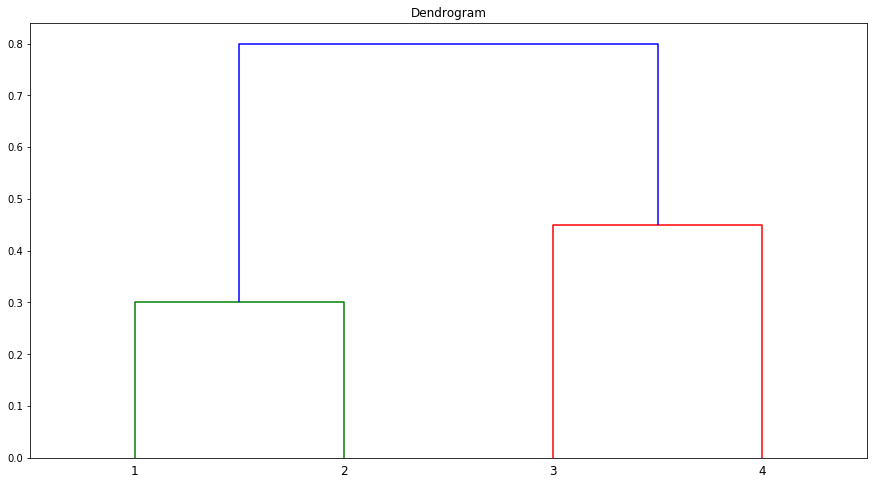

In [6]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(b) Repeat (a), this time using single linkage clustering.

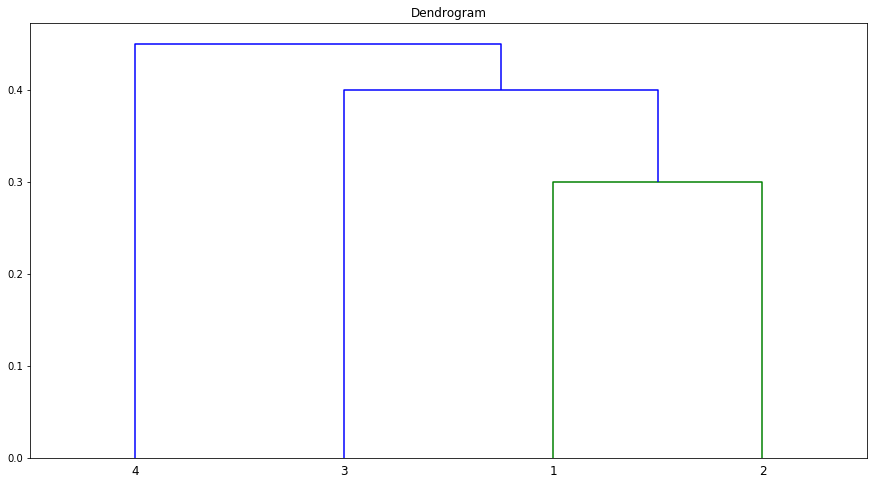

In [7]:
linkage_matrix = linkage(dists, "single")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

<b>Sol:</b> Observations 1 and 2 are in Cluster A and 3 and 4 in Cluster B.

(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

<b>Sol:</b> Observations 1, 2 and 3 are in Cluster A and 4 in Cluster B.

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

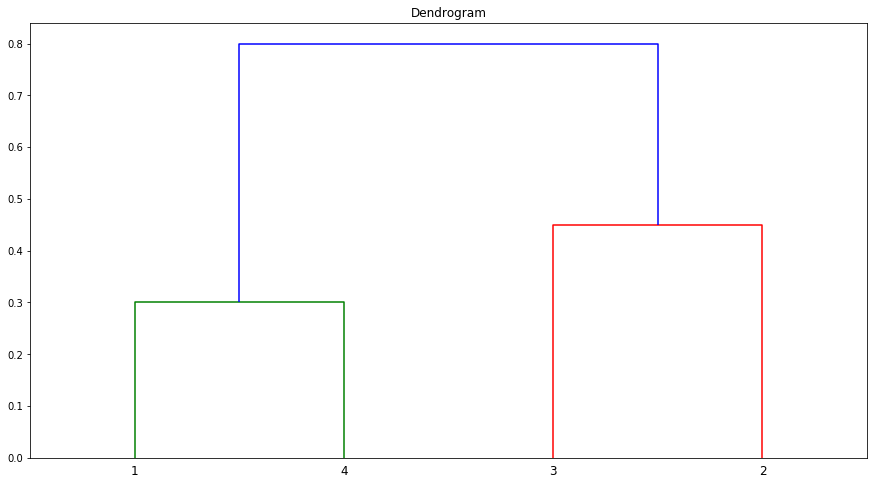

In [13]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()

Q3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

(a) Plot the observations.

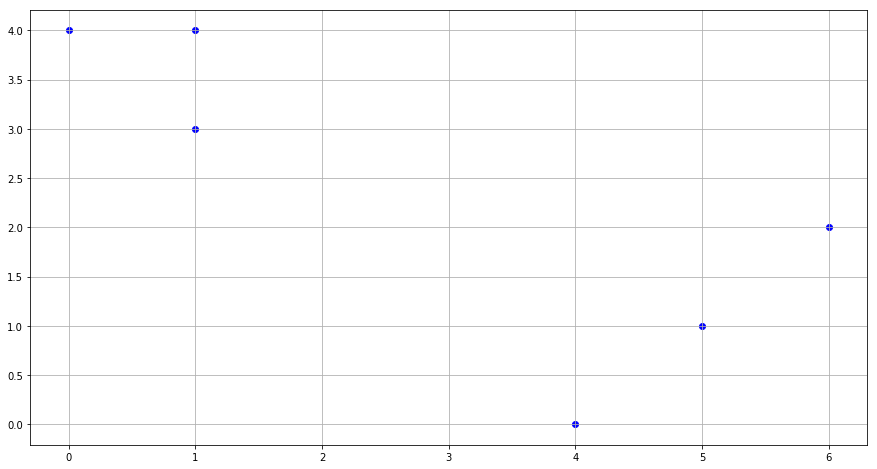

In [62]:
x1 = [1,1,0,5,6,4]
x2 = [4,3,4,1,2,0]
fig = plt.figure(figsize=(15,8))
plt.scatter(x1, x2, c='blue')
plt.grid()
plt.show()

(b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

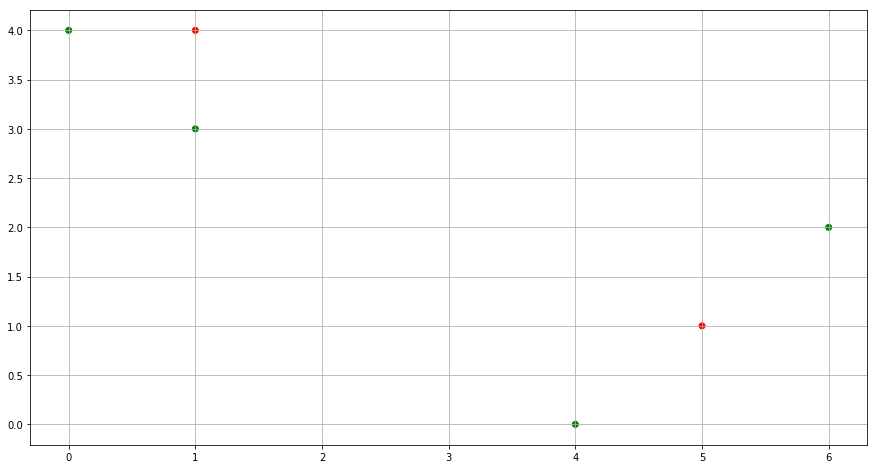

In [63]:
np.random.seed(0)
cluster_labels = np.random.randint(2, size=6)
color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
plt.scatter(x1, x2, c=color)
plt.grid()
plt.show()

(c) Compute the centroid for each cluster.

In [64]:
centroid_0_x1 = 0
centroid_0_x2 = 0
centroid_1_x1 = 0
centroid_1_x2 = 0
count_0 = 0
count_1 = 0

for idx, cluster in enumerate(cluster_labels):
    if cluster == 0:
        centroid_0_x1 += x1[idx]
        centroid_0_x2 += x2[idx]
        count_0 += 1
    else:
        centroid_1_x1 += x1[idx]
        centroid_1_x2 += x2[idx]
        count_1 += 1

centroid_0_x1 = centroid_0_x1/count_0
centroid_0_x2 = centroid_0_x2/count_0
centroid_1_x1 = centroid_1_x1/count_1
centroid_1_x2 = centroid_1_x2/count_1
print("Centriod for Clutser 0 is: " + str(centroid_0_x1) + ", " + str(centroid_0_x2))
print("Centriod for Clutser 1 is: " + str(centroid_1_x1) + ", " + str(centroid_1_x2))

Centriod for Clutser 0 is: 3.0, 2.5
Centriod for Clutser 1 is: 2.75, 2.25


(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

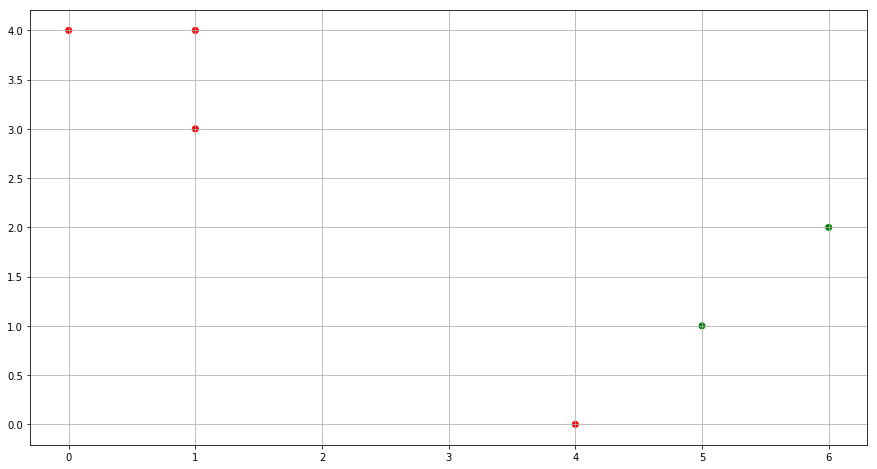

In [65]:
for idx, cluster in enumerate(cluster_labels):
    dist_0 = (x1[idx] - centroid_0_x1)**2 + (x2[idx] - centroid_0_x2)**2 
    dist_1 = (x1[idx] - centroid_1_x1)**2 + (x2[idx] - centroid_1_x2)**2 
    if dist_0 > dist_1:
        cluster_labels[idx] = 0
    else:
        cluster_labels[idx] = 1

color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
plt.scatter(x1, x2, c=color)
plt.grid()
plt.show()

(e) Repeat (c) and (d) until the answers obtained stop changing.

(f) In your plot from (a), color the observations according to the cluster labels obtained.

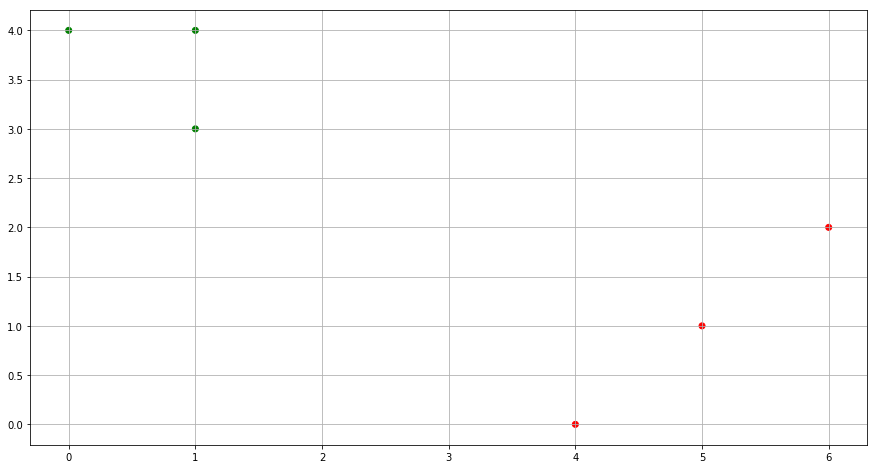

In [91]:
from sklearn.cluster import KMeans

M = np.column_stack((x1,x2))
kmeans = KMeans(n_clusters=2, random_state=0).fit(M)
cluster_labels = kmeans.labels_

color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
plt.scatter(x1, x2, c=color)
plt.grid()
plt.show()

Q4. Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.

(a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

<b>Sol:</b> In the case of complete linkage, the fusion will occure higher on the tree as it takes into account the maximum intercluster dissimilarity as the dissimilarity of the group.

(b) At a certain point on the single linkage dendrogram, the clusters {5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

<b>Sol:</b> With two points, the fusion will occur at the same height as the minimal (for single) and maximal (for complete) intercluster distance will be same. 

Q5. In words, describe the results that you would expect if you performed K-means clustering of the eight shoppers in Figure 10.14, on the basis of their sock and computer purchases, with K = 2. Give three answers, one for each of the variable scalings displayed. Explain.

<b>Sol:</b> If we do the clustering on the basis of raw numbers, socks will dominate as there purchase count is higher. For the case of scaled version, the number of computer purchased should play a greater role. If we consider the clustering based on purchase amount in dollar, once again compuetr will dominate in deciding the outcome of the clustering. The graphical representation of clustering results is shown below as well.

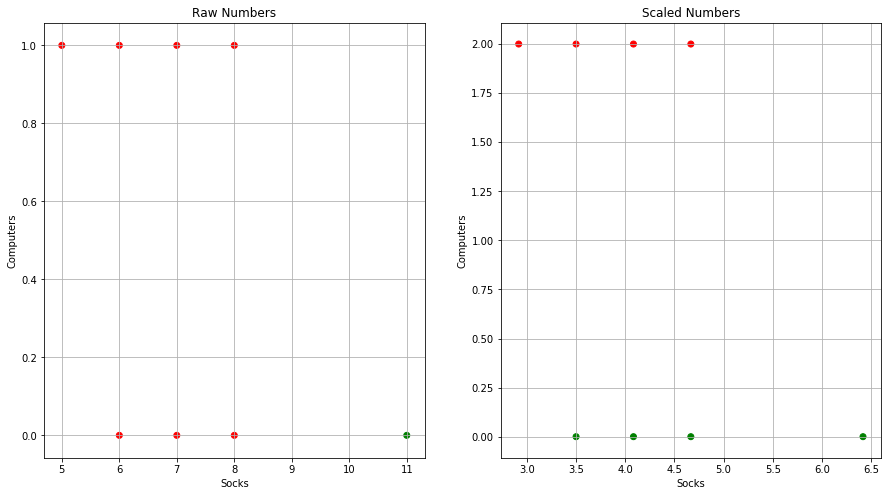

In [114]:
from scipy.cluster.vq import whiten

socks = [8, 11, 7, 6, 5, 6, 7, 8]
computers = [0, 0, 0, 0, 1, 1, 1, 1]

M = np.column_stack((socks,computers))
kmeans = KMeans(n_clusters=2, random_state=0).fit(M)
cluster_labels = kmeans.labels_

color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
plt.scatter(socks, computers, c=color)
ax.set_xlabel("Socks")
ax.set_ylabel("Computers")
ax.set_title("Raw Numbers")
ax.grid()

whitened = whiten(M)
kmeans = KMeans(n_clusters=2, random_state=0).fit(whitened)
cluster_labels = kmeans.labels_

color= ['red' if l == 0 else 'green' for l in cluster_labels]
ax = fig.add_subplot(122)
plt.scatter(whitened[:, 0], whitened[:, 1], c=color)
ax.set_xlabel("Socks")
ax.set_ylabel("Computers")
ax.set_title("Scaled Numbers")
ax.grid()

plt.show()

#### Applied

Q7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the ith and jth observations, then the quantity $1−r_{ij}$ is proportional to the squared Euclidean distance between the ith and jth observations. On the USArrests data, show that this proportionality holds. 

Hint: The Euclidean distance can be calculated using the dist() function, and correlations can be calculated using the cor() function.

In [130]:
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist

df = pd.read_csv("data/USArrests.csv")
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], axis=1)
d_euclidean = cdist(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], df[['Murder', 'Assault', 'UrbanPop', 'Rape']], 
          metric='euclidean')
d_correlation = cdist(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], df[['Murder', 'Assault', 'UrbanPop', 'Rape']], 
          metric='correlation')

In [146]:
df_relation = pd.DataFrame(d_euclidean**2/(1-d_correlation))
df_relation.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.917196,1.377766,0.768684,0.835502,0.633609,0.551528,0.636466,0.638445,0.929853,0.848389,...,0.387890,0.730992,0.490706,0.547206,0.543436,0.475501,0.400632,0.404453,3.159859,0.509535
std,2.491905,3.625065,2.114578,2.286917,1.747983,1.476750,0.579707,1.779954,2.525718,2.318681,...,0.806068,2.020526,1.366438,0.562794,0.564614,1.318453,0.867514,0.971656,2.161903,1.421946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032012,0.089498,0.016312,0.028225,0.031815,0.052559,0.176210,0.029639,0.034926,0.032570,...,0.037003,0.014472,0.035702,0.136008,0.129466,0.032512,0.062962,0.052856,1.396576,0.040784
50%,0.194972,0.371256,0.121050,0.153813,0.123040,0.114278,0.501816,0.107965,0.195236,0.163924,...,0.166428,0.110865,0.102117,0.406559,0.416032,0.105314,0.154284,0.159624,2.840412,0.097088
75%,0.661991,1.044089,0.525318,0.588041,0.389477,0.295860,0.981708,0.393930,0.673405,0.599727,...,0.392379,0.488617,0.266171,0.846270,0.819825,0.265969,0.355743,0.274510,4.886207,0.267781
max,16.482235,24.396269,13.874904,15.058890,11.408640,9.635337,2.790843,11.655091,16.705192,15.286165,...,5.393157,13.240649,8.948936,3.163273,3.277025,8.635749,5.784783,6.473499,7.762162,9.310704


Q8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function.

On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

(b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [163]:
import numpy as np
from sklearn.decomposition import PCA

df = pd.read_csv("data/USArrests.csv")
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], axis=1)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])
print("Variance Explained (from the model): " + str(pca.explained_variance_ratio_[0]))
print("Variance Explained (calculated manually): " + str(np.var(principalComponents)/df.var().sum()))

Variance Explained (from the model): 0.9453253030966985
Variance Explained (calculated manually): 0.926418797034764


Q9. Consider the USArrests data. We will now perform hierarchical clusteringon the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [181]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

df = pd.read_csv("data/USArrests.csv")
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

clustering = AgglomerativeClustering(linkage="complete", affinity="euclidean", compute_full_tree=True).fit(X)

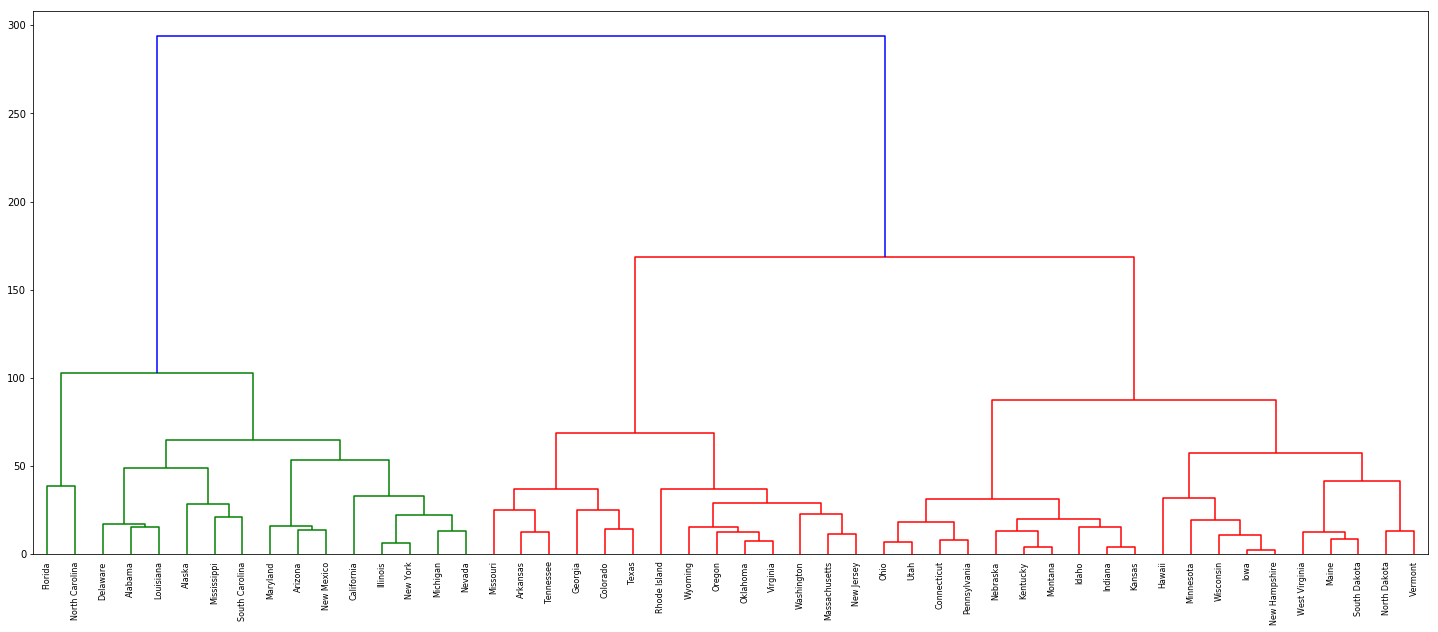

In [183]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist())

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

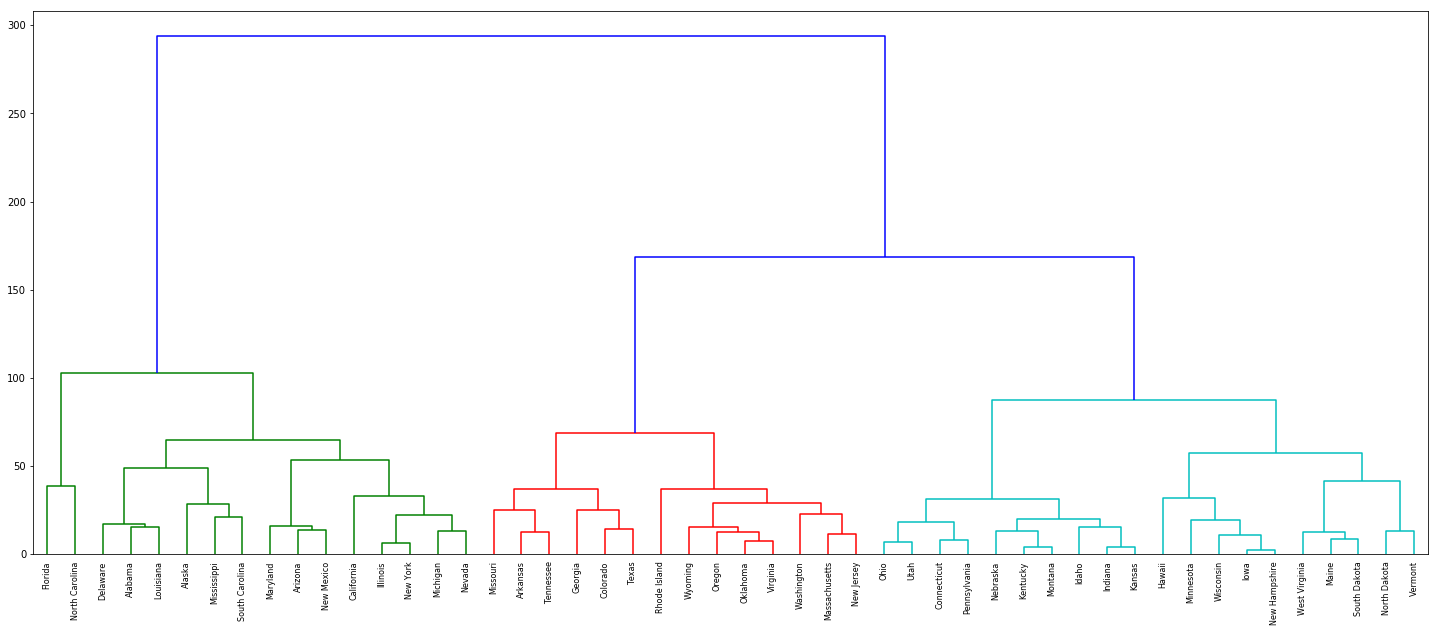

In [185]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist(), color_threshold=120)

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

<b>Sol:</b> The variables should be scaled as the units are different for different features.

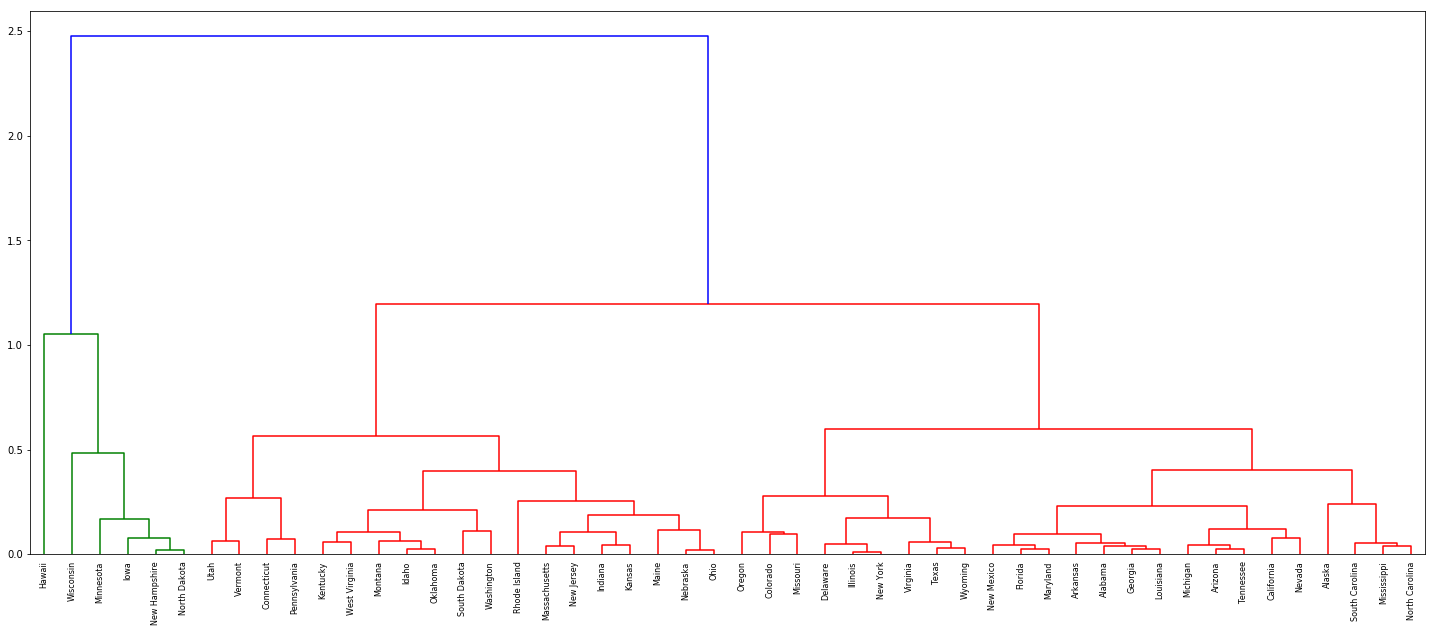

In [188]:
df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = scale(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], axis=1)
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist())

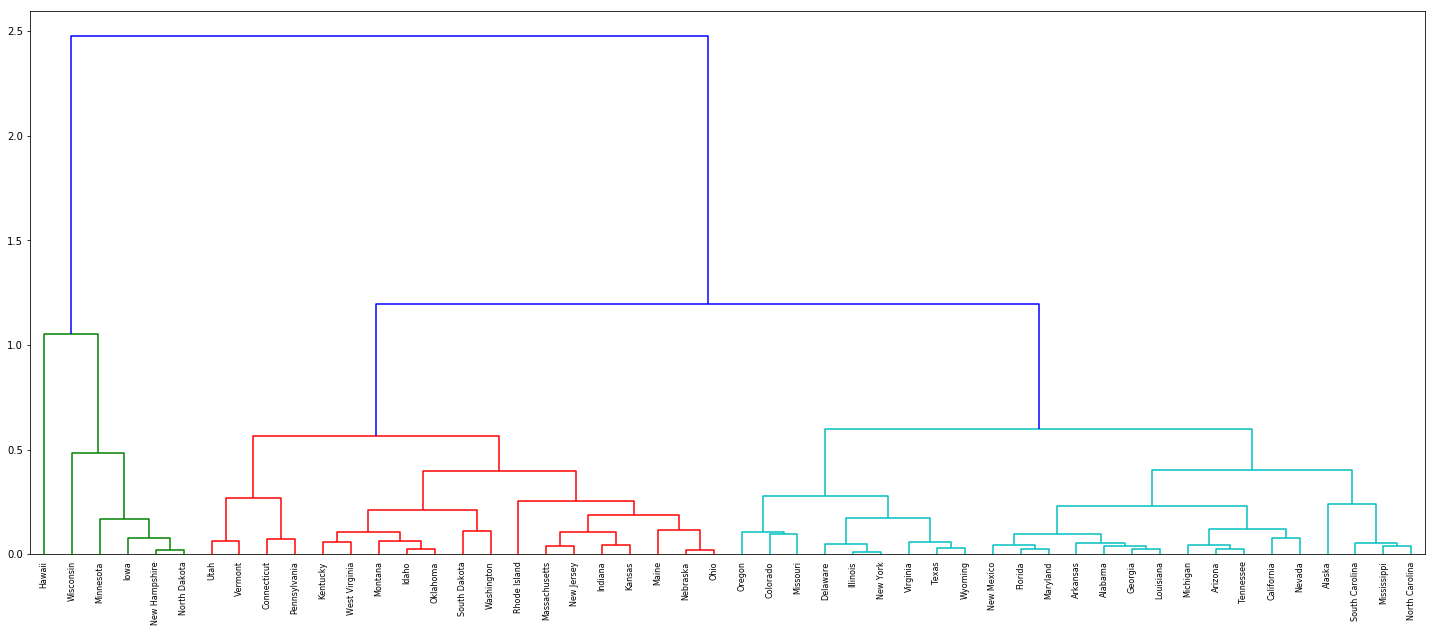

In [189]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist(), color_threshold=1.1)

Q10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [245]:
np.random.seed(0)
c1 = np.append(np.random.normal(0, 0.01, (20, 50)), np.full((20, 1), 1), axis=1)
c2 = np.append(np.random.normal(0.2, 0.01, (20, 50)), np.full((20, 1), 2), axis=1)
c3 = np.append(np.random.normal(-0.2, 0.01, (20, 50)), np.full((20, 1), 3), axis=1)

df = pd.DataFrame(np.vstack((c1,c2,c3)))

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [246]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.iloc[:,0:50])
df_pca = pd.DataFrame(principalComponents, columns=['first', 'second'])
df_pca['labels'] = df[[50]]
df_pca.labels = df_pca.labels.astype(int)

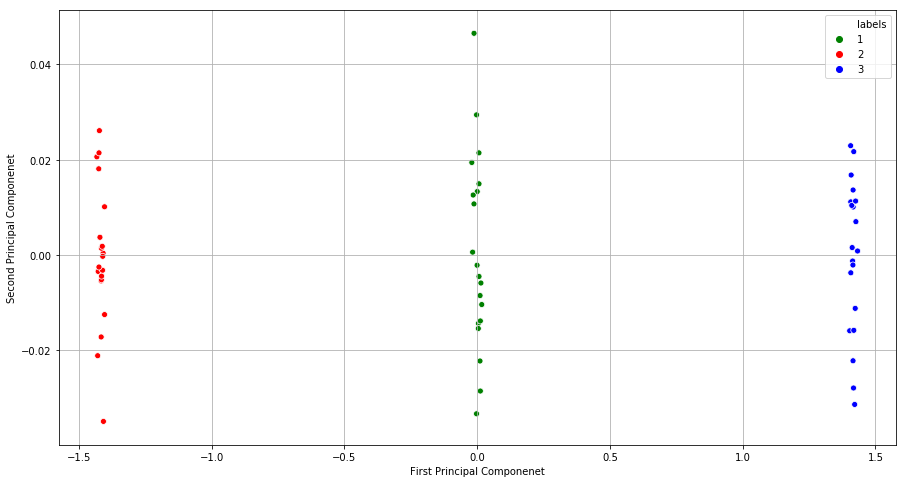

In [247]:
import seaborn as sns

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x="first", y="second", hue="labels", palette={1:'green', 2:'red', 3:'blue'}, data=df_pca)
plt.grid()
plt.xlabel("First Principal Componenet")
plt.ylabel("Second Principal Componenet")
plt.show()

(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

<b>Sol:</b> The results of clustering are well in sync with the class labels.

In [253]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df.iloc[:,0:50])
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(d) Perform K-means clustering with K = 2. Describe your results.

<b>Sol:</b> The observations belonging to first two class labels are clustered accordingly. The observations belonging to the third class label is clustered in the same group with the observations belonging to first class label.

In [254]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df.iloc[:,0:50])
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(e) Now perform K-means clustering with K = 4, and describe your results.

<b>Sol:</b> The observations belonging to the first two class labels are clustered accordingly. The observations belonging to the third class label is further clustered into two subgroups.

In [259]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df.iloc[:,0:50])
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 3 0 3 0 3 3 0 0 0 3 0 0 3 3 0 3 3 0 3]


(f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

<b>Sol:</b> The observations belonging to the last two class labels are clustered accordingly. The observations belonging to the first class label is further clustered into two subgroups.

In [260]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pca[['first', 'second']])
print(kmeans.labels_)

[3 2 3 2 2 2 2 2 3 3 2 2 2 2 3 3 3 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Q11. On the book website, www.StatLearning.com, there is a gene expression data set (Ch10Ex11.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

(a) Load in the data using read.csv(). You will need to select header=F.

In [276]:
df = pd.read_csv("data/GeneExpression.csv", header=None)
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


(b) Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

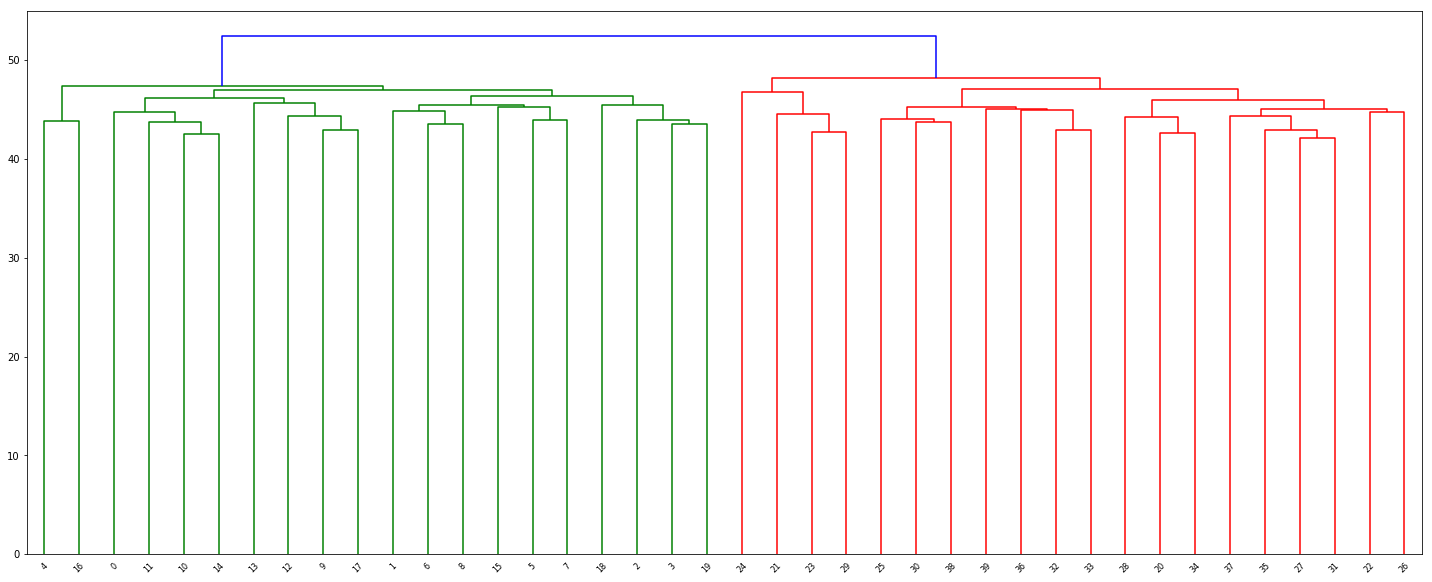

In [277]:
Z = linkage(df, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, color_threshold=49)

(c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

<b>Sol:</b> This can be achieved by doing PCA over the data set and reporting the genes whose loadings are maximum (as loading denotes the weight of each feature in a specified principal component) as the important genes.